In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Problem 1: Clustering

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
# Loading the dataset.
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
# First 10 rows of the dataset.
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [4]:
# Dimensions of the dataset
print('The Bank Marketing Data has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The Bank Marketing Data has 210 rows and 7 columns


In [5]:
# Size of the dataset
print('The size of Bank Marketing Data',df.size)

The size of Bank Marketing Data 1470


In [6]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
# Checking for missing values
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
# Describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [9]:
#Checking for Duplicates
df.duplicated().sum()

0

In [10]:
#Univariate Analysis

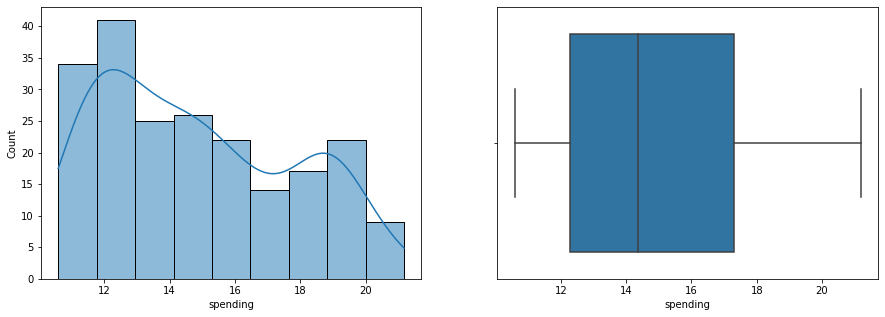

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['spending'], kde=True, ax=axes[0])
sns.boxplot(x='spending', data=df, ax=axes[1])
plt.show()

In [12]:
print("The 25th quantile of spending is",df['spending'].quantile(0.25))
print("The median or 50th quantile of spending is",df['spending'].quantile(0.5))
print("The 75th quantile of spending is",df['spending'].quantile(0.75))
print("The Interquantile range (IQR) of spending is",df['spending'].quantile(0.75)-df['spending'].quantile(0.25))
print("Lower limit of Duration is",df['spending'].quantile(0.25)-(1.5*(df['spending'].quantile(0.75)-df['spending'].quantile(0.25))))
print("Upper limit of Duration is",df['spending'].quantile(0.75)+(1.5*(df['spending'].quantile(0.75)-df['spending'].quantile(0.25))))
print("The distribution of spending is right skewed",df['spending'].skew())

The 25th quantile of spending is 12.27
The median or 50th quantile of spending is 14.355
The 75th quantile of spending is 17.305
The Interquantile range (IQR) of spending is 5.035
Lower limit of Duration is 4.717499999999999
Upper limit of Duration is 24.8575
The distribution of spending is right skewed 0.3998891917177586


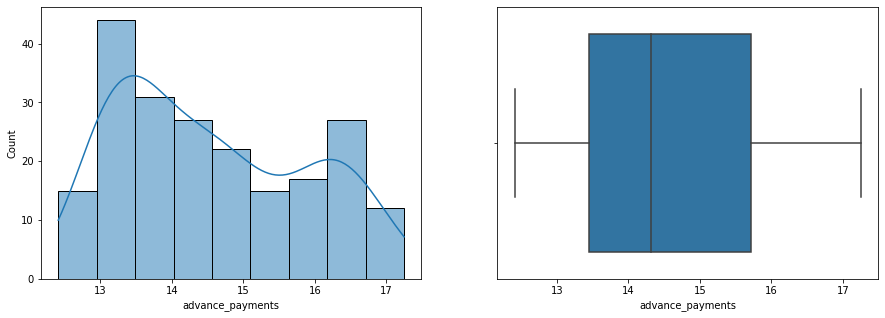

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['advance_payments'], kde=True, ax=axes[0])
sns.boxplot(x='advance_payments', data=df, ax=axes[1])
plt.show()

In [14]:
print("The 25th quantile of advance_payments is",df['advance_payments'].quantile(0.25))
print("The median or 50th quantile of advance_payments is",df['advance_payments'].quantile(0.5))
print("The 75th quantile of advance_payments is",df['advance_payments'].quantile(0.75))
print("The Interquantile range (IQR) of advance_payments is",df['advance_payments'].quantile(0.75)-df['advance_payments'].quantile(0.25))
print("Lower limit of Duration is",df['advance_payments'].quantile(0.25)-(1.5*(df['advance_payments'].quantile(0.75)-df['advance_payments'].quantile(0.25))))
print("Upper limit of Duration is",df['advance_payments'].quantile(0.75)+(1.5*(df['advance_payments'].quantile(0.75)-df['advance_payments'].quantile(0.25))))
print("The distribution of advance_payments is right skewed",df['advance_payments'].skew())

The 25th quantile of advance_payments is 13.45
The median or 50th quantile of advance_payments is 14.32
The 75th quantile of advance_payments is 15.715
The Interquantile range (IQR) of advance_payments is 2.2650000000000006
Lower limit of Duration is 10.052499999999998
Upper limit of Duration is 19.1125
The distribution of advance_payments is right skewed 0.3865727731912213


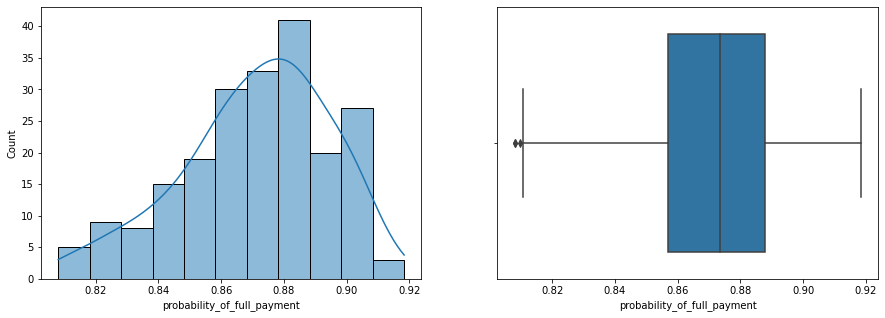

In [15]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[0])
sns.boxplot(x='probability_of_full_payment', data=df, ax=axes[1])
plt.show()

In [16]:
print("The 25th quantile of probability_of_full_payment is",df['probability_of_full_payment'].quantile(0.25))
print("The median or 50th quantile of probability_of_full_payment is",df['probability_of_full_payment'].quantile(0.5))
print("The 75th quantile of probability_of_full_payment is",df['probability_of_full_payment'].quantile(0.75))
print("The Interquantile range (IQR) of probability_of_full_payment is",df['probability_of_full_payment'].quantile(0.75)-df['probability_of_full_payment'].quantile(0.25))
print("Lower limit of Duration is",df['probability_of_full_payment'].quantile(0.25)-(1.5*(df['probability_of_full_payment'].quantile(0.75)-df['probability_of_full_payment'].quantile(0.25))))
print("Upper limit of Duration is",df['probability_of_full_payment'].quantile(0.75)+(1.5*(df['probability_of_full_payment'].quantile(0.75)-df['probability_of_full_payment'].quantile(0.25))))
print("The distribution of probability_of_full_payment is left skewed",df['probability_of_full_payment'].skew())

The 25th quantile of probability_of_full_payment is 0.8569
The median or 50th quantile of probability_of_full_payment is 0.8734500000000001
The 75th quantile of probability_of_full_payment is 0.887775
The Interquantile range (IQR) of probability_of_full_payment is 0.030874999999999986
Lower limit of Duration is 0.8105875
Upper limit of Duration is 0.9340875
The distribution of probability_of_full_payment is left skewed -0.5379537283982821


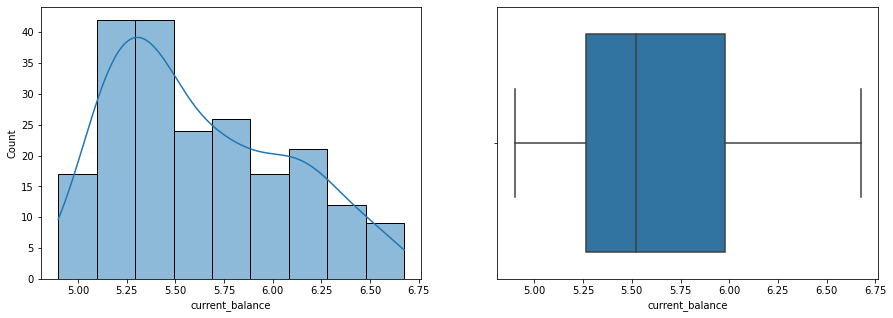

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['current_balance'], kde=True, ax=axes[0])
sns.boxplot(x='current_balance', data=df, ax=axes[1])
plt.show()

In [18]:
print("The 25th quantile of current_balance is",df['current_balance'].quantile(0.25))
print("The median or 50th quantile of current_balance is",df['current_balance'].quantile(0.5))
print("The 75th quantile of current_balance is",df['current_balance'].quantile(0.75))
print("The Interquantile range (IQR) of current_balance is",df['current_balance'].quantile(0.75)-df['current_balance'].quantile(0.25))
print("Lower limit of Duration is",df['current_balance'].quantile(0.25)-(1.5*(df['current_balance'].quantile(0.75)-df['current_balance'].quantile(0.25))))
print("Upper limit of Duration is",df['current_balance'].quantile(0.75)+(1.5*(df['current_balance'].quantile(0.75)-df['current_balance'].quantile(0.25))))
print("The distribution of current_balance is right skewed",df['current_balance'].skew())

The 25th quantile of current_balance is 5.26225
The median or 50th quantile of current_balance is 5.5235
The 75th quantile of current_balance is 5.97975
The Interquantile range (IQR) of current_balance is 0.7175000000000002
Lower limit of Duration is 4.186
Upper limit of Duration is 7.056000000000001
The distribution of current_balance is right skewed 0.52548156013189


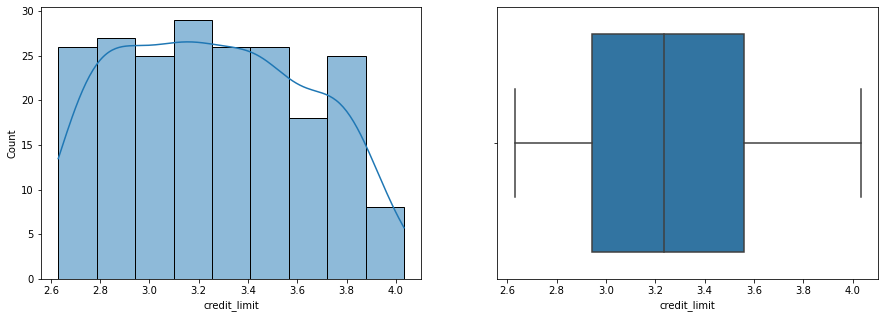

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['credit_limit'], kde=True, ax=axes[0])
sns.boxplot(x='credit_limit', data=df, ax=axes[1])
plt.show()

In [20]:
print("The 25th quantile of credit_limit is",df['credit_limit'].quantile(0.25))
print("The median or 50th quantile of credit_limit is",df['credit_limit'].quantile(0.5))
print("The 75th quantile of credit_limit is",df['current_balance'].quantile(0.75))
print("The Interquantile range (IQR) of credit_limit is",df['credit_limit'].quantile(0.75)-df['credit_limit'].quantile(0.25))
print("Lower limit of Duration is",df['credit_limit'].quantile(0.25)-(1.5*(df['credit_limit'].quantile(0.75)-df['credit_limit'].quantile(0.25))))
print("Upper limit of Duration is",df['credit_limit'].quantile(0.75)+(1.5*(df['credit_limit'].quantile(0.75)-df['credit_limit'].quantile(0.25))))
print("The distribution of credit_limit is right skewed",df['credit_limit'].skew())

The 25th quantile of credit_limit is 2.944
The median or 50th quantile of credit_limit is 3.237
The 75th quantile of credit_limit is 5.97975
The Interquantile range (IQR) of credit_limit is 0.61775
Lower limit of Duration is 2.017375
Upper limit of Duration is 4.488375
The distribution of credit_limit is right skewed 0.13437824513162136


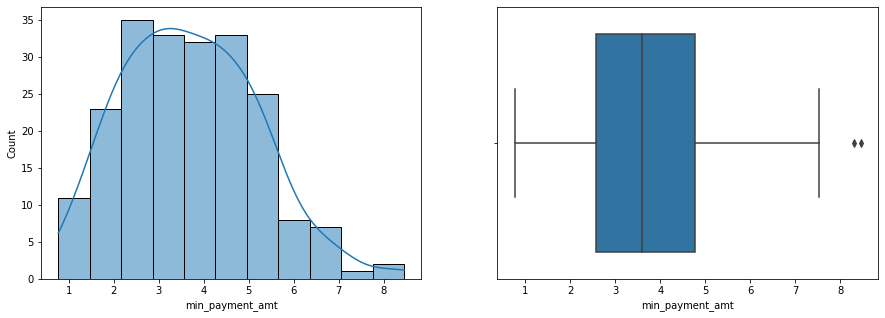

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['min_payment_amt'], kde=True, ax=axes[0])
sns.boxplot(x='min_payment_amt', data=df, ax=axes[1])
plt.show()

In [22]:
print("The 25th quantile of min_payment_amt is",df['min_payment_amt'].quantile(0.25))
print("The median or 50th quantile of min_payment_amt is",df['min_payment_amt'].quantile(0.5))
print("The 75th quantile of min_payment_amt is",df['min_payment_amt'].quantile(0.75))
print("The Interquantile range (IQR) of min_payment_amt is",df['min_payment_amt'].quantile(0.75)-df['min_payment_amt'].quantile(0.25))
print("Lower limit of Duration is",df['min_payment_amt'].quantile(0.25)-(1.5*(df['min_payment_amt'].quantile(0.75)-df['min_payment_amt'].quantile(0.25))))
print("Upper limit of Duration is",df['min_payment_amt'].quantile(0.75)+(1.5*(df['min_payment_amt'].quantile(0.75)-df['min_payment_amt'].quantile(0.25))))
print("The distribution of min_payment_amt is right skewed",df['min_payment_amt'].skew())

The 25th quantile of min_payment_amt is 2.5614999999999997
The median or 50th quantile of min_payment_amt is 3.599
The 75th quantile of min_payment_amt is 4.76875
The Interquantile range (IQR) of min_payment_amt is 2.20725
Lower limit of Duration is -0.7493750000000006
Upper limit of Duration is 8.079625
The distribution of min_payment_amt is right skewed 0.40166734329025183


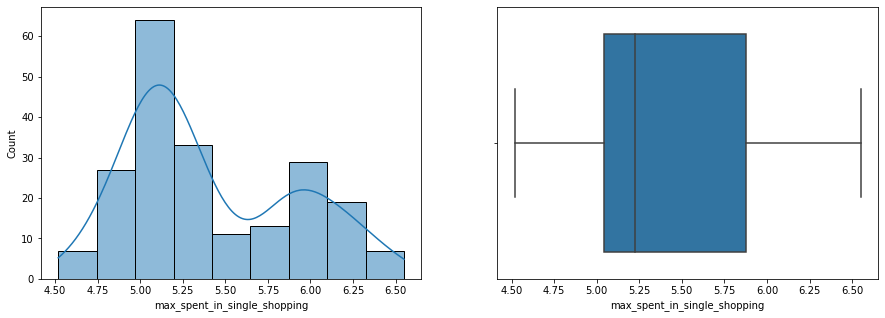

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df['max_spent_in_single_shopping'], kde=True, ax=axes[0])
sns.boxplot(x='max_spent_in_single_shopping', data=df, ax=axes[1])
plt.show()

In [24]:
print("The 25th quantile of max_spent_in_single_shopping is",df['max_spent_in_single_shopping'].quantile(0.25))
print("The median or 50th quantile of max_spent_in_single_shopping is",df['max_spent_in_single_shopping'].quantile(0.5))
print("The 75th quantile of max_spent_in_single_shopping is",df['max_spent_in_single_shopping'].quantile(0.75))
print("The Interquantile range (IQR) of max_spent_in_single_shopping is",df['max_spent_in_single_shopping'].quantile(0.75)-df['max_spent_in_single_shopping'].quantile(0.25))
print("Lower limit of Duration is",df['max_spent_in_single_shopping'].quantile(0.25)-(1.5*(df['max_spent_in_single_shopping'].quantile(0.75)-df['max_spent_in_single_shopping'].quantile(0.25))))
print("Upper limit of Duration is",df['max_spent_in_single_shopping'].quantile(0.75)+(1.5*(df['max_spent_in_single_shopping'].quantile(0.75)-df['max_spent_in_single_shopping'].quantile(0.25))))
print("The distribution of max_spent_in_single_shopping is right skewed",df['max_spent_in_single_shopping'].skew())

The 25th quantile of max_spent_in_single_shopping is 5.045
The median or 50th quantile of max_spent_in_single_shopping is 5.223000000000001
The 75th quantile of max_spent_in_single_shopping is 5.877000000000001
The Interquantile range (IQR) of max_spent_in_single_shopping is 0.8320000000000007
Lower limit of Duration is 3.796999999999999
Upper limit of Duration is 7.125000000000002
The distribution of max_spent_in_single_shopping is right skewed 0.5618973749548658


In [25]:
#Multivariate Analysis

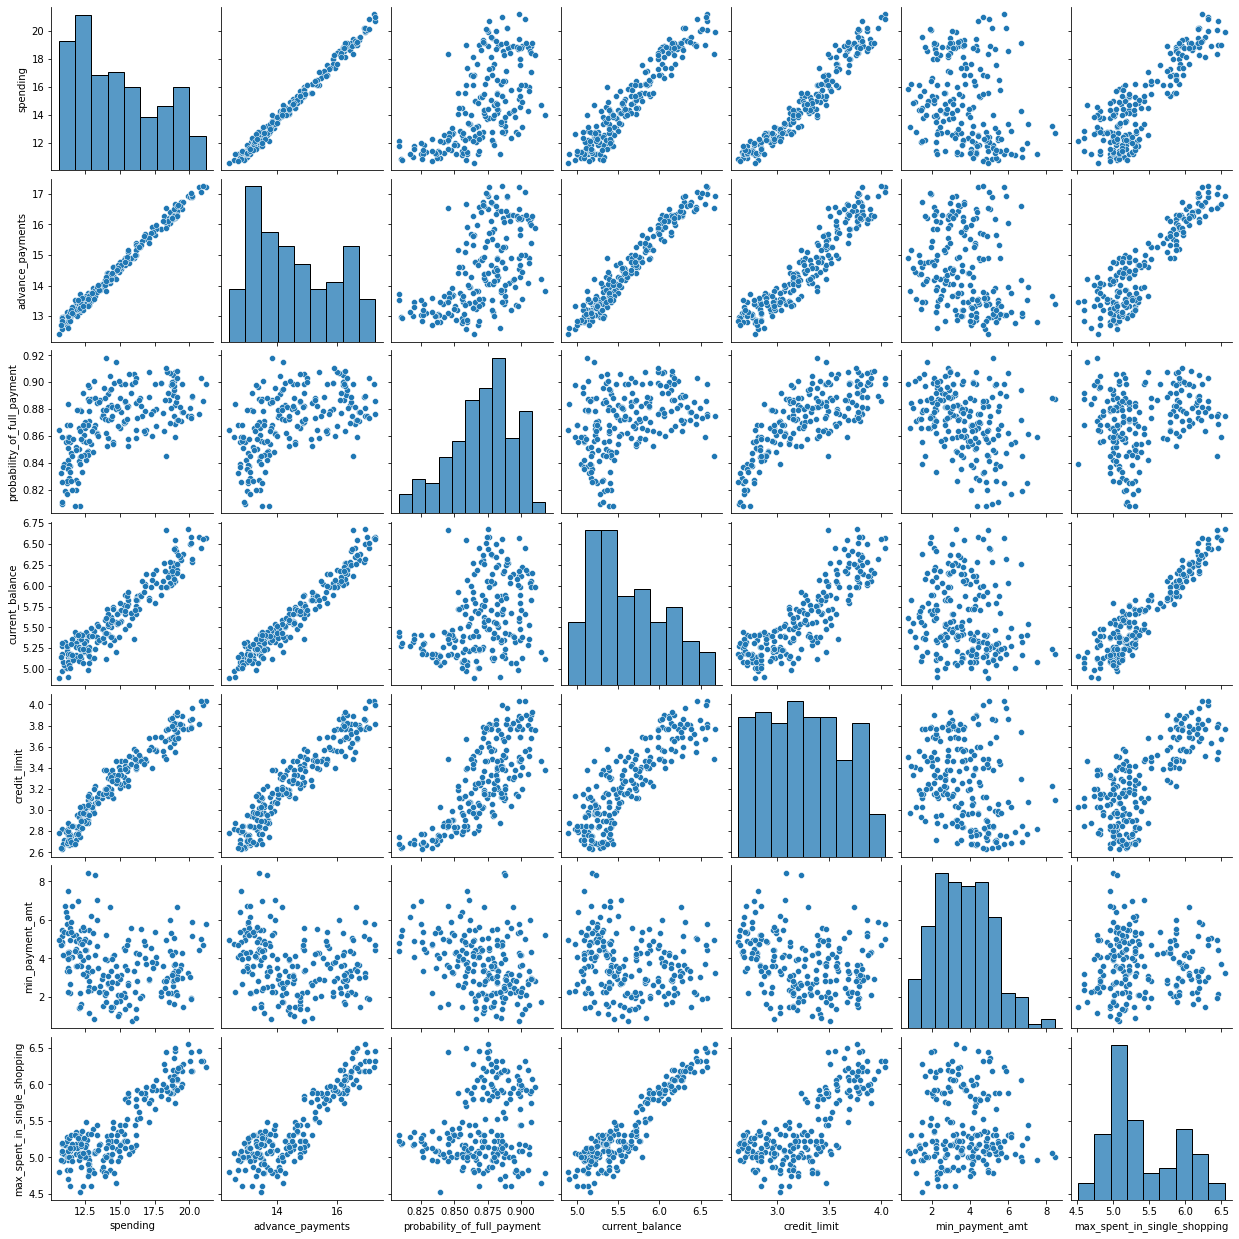

In [26]:
sns.pairplot(df);

In [27]:
corr = df.corr()
round(corr,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


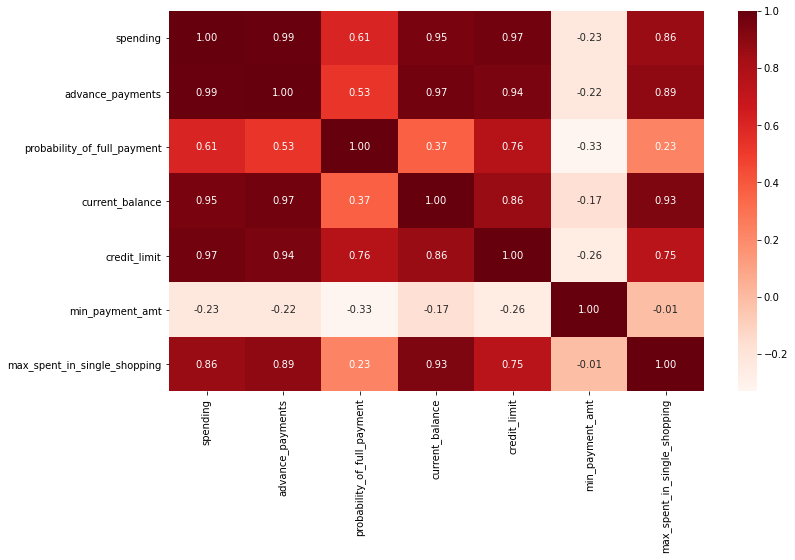

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot = True,fmt='.2f',cmap='Reds')
plt.show();

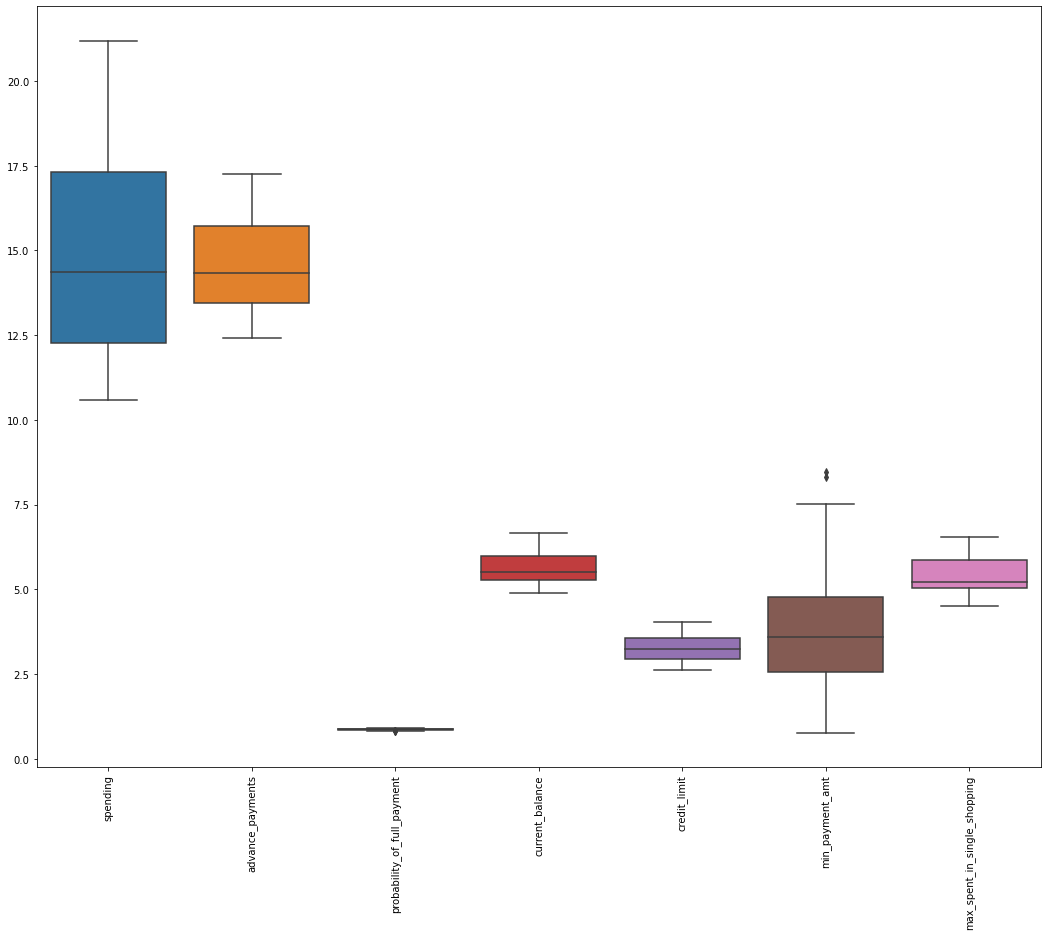

In [29]:
# Checking for Outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);
plt.show()

In [30]:
#Treating Outliers
df1=df.copy()

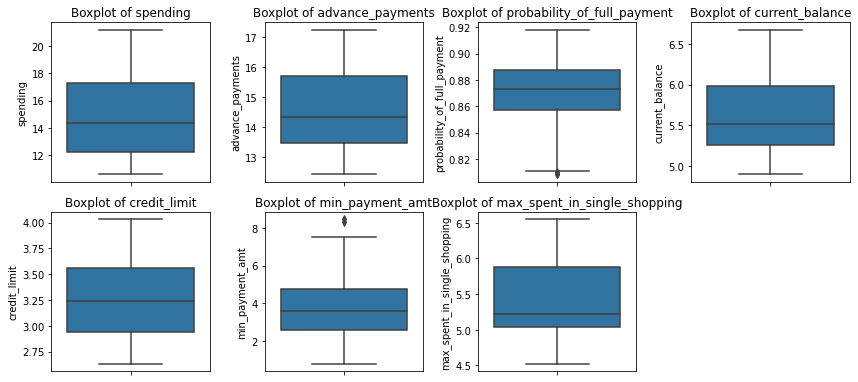

In [31]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [32]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [33]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df1[i])
    df1[i] = np.where(df1[i] > UL, UL, df1[i])
    df1[i] = np.where(df1[i] < LL, LL, df1[i])

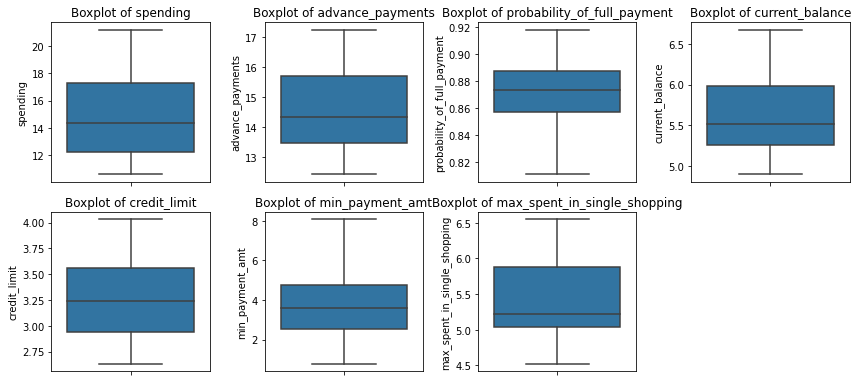

In [34]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [35]:
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
data_scaled=df1.apply(zscore)

In [36]:
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
wardlink = linkage(data_scaled, method = 'ward')

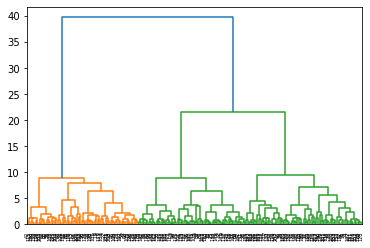

In [39]:
dend = dendrogram(wardlink)

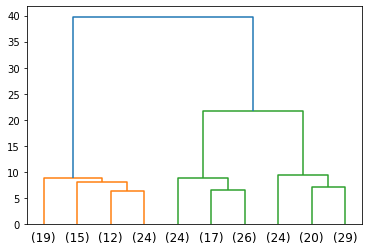

In [40]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

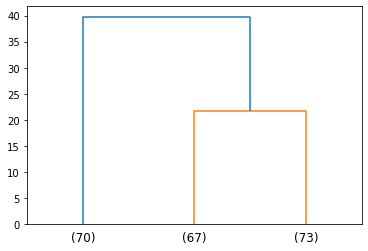

In [41]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 3,
                 )

In [42]:
from scipy.cluster.hierarchy import fcluster

In [43]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [44]:
#Method 2

clusters1 = fcluster(wardlink, 18, criterion='distance')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [45]:
df['clusters'] = clusters

In [46]:
df.to_csv('Clusters_3.csv')

In [47]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [48]:
df['clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [49]:
agglo_data=df.groupby('clusters').mean()
agglo_data['Freq']=df['clusters'].value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
clusters= AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
cluster_agglo=clusters.fit_predict(data_scaled)
print(cluster_agglo)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


In [52]:
df["Agglo_clusters"]=cluster_agglo

In [53]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Agglo_clusters'],
      dtype='object')

In [54]:
agglo_data=df.drop(["clusters"],axis=1).groupby("Agglo_clusters").mean()
agglo_data["Freq"]=df.Agglo_clusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_clusters,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [55]:
from sklearn.cluster import KMeans

In [56]:
k_means = KMeans(n_clusters = 1, random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

1469.9999999999998

In [57]:
k_means = KMeans(n_clusters = 2, random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

659.1474009548498

In [58]:
k_means = KMeans(n_clusters = 3, random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

430.298481751223

In [59]:
k_means = KMeans(n_clusters = 4, random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

371.221763926848

In [60]:
k_means = KMeans(n_clusters = 5, random_state=1)
k_means.fit(data_scaled)
k_means.inertia_

326.8846407681858

#### Calculating WSS for other values of K- Elbow Method

In [61]:
wss =[] 

In [62]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)

In [63]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.221763926848,
 326.8846407681858,
 290.15133123739645,
 263.0291032947617,
 242.8107073317113,
 221.4875969822111,
 206.32904650770408]

C:\Users\hnimmagadda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


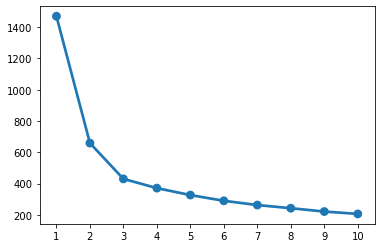

In [64]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a,wss);

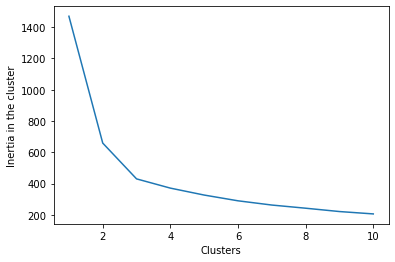

In [65]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [67]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(data_scaled)
labels_2 = k_means.labels_

In [68]:
# Cluster_2
silhouette_score(data_scaled,labels_2, random_state=1)

0.46560100442748986

In [69]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(data_scaled)
labels_3 = k_means.labels_

In [70]:
# Cluster_3
silhouette_score(data_scaled,labels_3, random_state=1)

0.4008059221522216

In [71]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(data_scaled)
labels_4 = k_means.labels_

In [72]:
# Cluster_4
silhouette_score(data_scaled,labels_4, random_state=1)

0.32943733699973826

In [73]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(data_scaled)
labels_5 = k_means.labels_

In [74]:
# Cluster_5
silhouette_score(data_scaled,labels_5, random_state=1)

0.2864873724729606

In [75]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [76]:
df["kmeans3"] = labels_3
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters,kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0


In [77]:
df['kmeans3'].value_counts().sort_index()

0    67
1    72
2    71
Name: kmeans3, dtype: int64

In [78]:
sil_width = silhouette_samples(data_scaled, labels_3)

In [79]:
df['sil_width'] = sil_width
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters,kmeans3,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0,0.573278
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,2,0.365564
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0,0.637092
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1,0.515595
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0,0.360972


In [80]:
silhouette_samples(data_scaled, labels_3).min()

0.002768541128616533

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [81]:
clust_profile=df
clust_profile=clust_profile.groupby("kmeans3").mean()
clust_profile["Freq"]=df['kmeans3'].value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters,sil_width,Freq
kmeans3,,,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.985075,0.468077,67
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,1.833333,0.399556,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.084507,0.338593,71


## Problem 2: CART-RF-ANN

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [82]:
# Loading the dataset.
df2 = pd.read_csv("insurance_part2_data.csv")

In [83]:
# First 10 rows of the dataset.
df2.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [84]:
# Dimensions of the dataset
print('The Insurance Data has {} rows and {} columns'.format(df2.shape[0],df2.shape[1]))

The Insurance Data has 3000 rows and 10 columns


In [85]:
# Size of the dataset
print('The size of Insurance Data',df2.size)

The size of Insurance Data 30000


In [86]:
# Summary of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [87]:
# Checking for missing values
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [88]:
# Describing the data
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [89]:
#Checking for Duplicates
df2.duplicated().sum()

139

In [90]:
#dropping duplicates
df2.drop_duplicates(inplace = True)
df2.duplicated().sum()

0

### Univariate Analysis

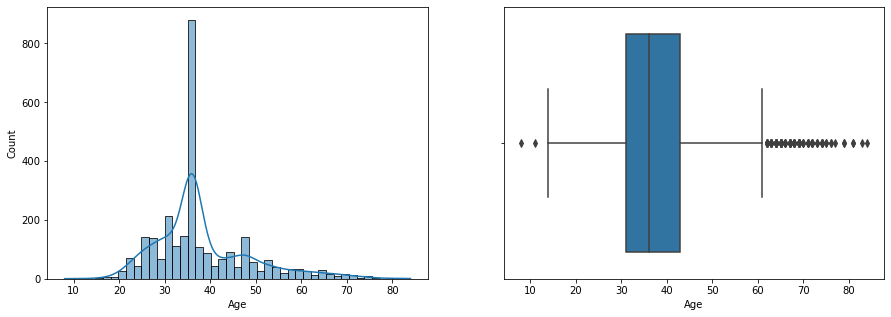

In [91]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df2['Age'], kde=True, ax=axes[0])
sns.boxplot(x='Age', data=df2, ax=axes[1])
plt.show()

In [92]:
print("The 25th quantile of Age is",df2['Age'].quantile(0.25))
print("The median or 50th quantile of Age is",df2['Age'].quantile(0.5))
print("The 75th quantile of Age is",df2['Age'].quantile(0.75))
print("The Interquantile range (IQR) of Age is",df2['Age'].quantile(0.75)-df2['Age'].quantile(0.25))
print("Lower limit of Age is",df2['Age'].quantile(0.25)-(1.5*(df2['Age'].quantile(0.75)-df2['Age'].quantile(0.25))))
print("Upper limit of Age is",df2['Age'].quantile(0.75)+(1.5*(df2['Age'].quantile(0.75)-df2['Age'].quantile(0.25))))
print("The distribution of Age is right skewed",df2['Age'].skew())

The 25th quantile of Age is 31.0
The median or 50th quantile of Age is 36.0
The 75th quantile of Age is 43.0
The Interquantile range (IQR) of Age is 12.0
Lower limit of Age is 13.0
Upper limit of Age is 61.0
The distribution of Age is right skewed 1.1031446044352335


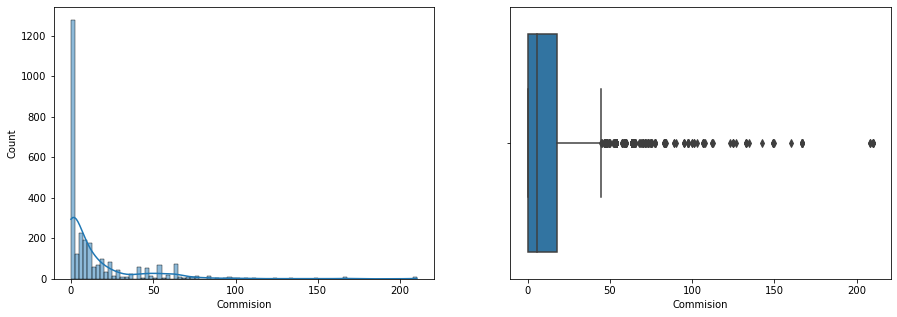

In [93]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df2['Commision'], kde=True, ax=axes[0])
sns.boxplot(x='Commision', data=df2, ax=axes[1])
plt.show()

In [94]:
print("The 25th quantile of Commision is",df2['Commision'].quantile(0.25))
print("The median or 50th quantile of Commision is",df2['Commision'].quantile(0.5))
print("The 75th quantile of Commision is",df2['Commision'].quantile(0.75))
print("The Interquantile range (IQR) of Commision is",df2['Commision'].quantile(0.75)-df2['Commision'].quantile(0.25))
print("Lower limit of Commision is",df2['Commision'].quantile(0.25)-(1.5*(df2['Commision'].quantile(0.75)-df2['Commision'].quantile(0.25))))
print("Upper limit of Commision is",df2['Commision'].quantile(0.75)+(1.5*(df2['Commision'].quantile(0.75)-df2['Commision'].quantile(0.25))))
print("The distribution of Commision is right skewed",df2['Commision'].skew())

The 25th quantile of Commision is 0.0
The median or 50th quantile of Commision is 5.63
The 75th quantile of Commision is 17.82
The Interquantile range (IQR) of Commision is 17.82
Lower limit of Commision is -26.73
Upper limit of Commision is 44.55
The distribution of Commision is right skewed 3.1047406576922842


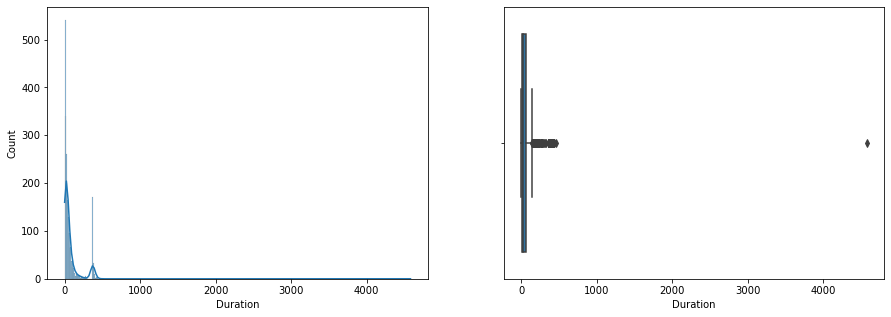

In [95]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df2['Duration'], kde=True, ax=axes[0])
sns.boxplot(x='Duration', data=df2, ax=axes[1])
plt.show()

In [96]:
print("The 25th quantile of Duration is",df2['Duration'].quantile(0.25))
print("The median or 50th quantile of Duration is",df2['Duration'].quantile(0.5))
print("The 75th quantile of Duration is",df2['Duration'].quantile(0.75))
print("The Interquantile range (IQR) of Duration is",df2['Duration'].quantile(0.75)-df2['Duration'].quantile(0.25))
print("Lower limit of Duration is",df2['Duration'].quantile(0.25)-(1.5*(df2['Duration'].quantile(0.75)-df2['Duration'].quantile(0.25))))
print("Upper limit of Duration is",df2['Duration'].quantile(0.75)+(1.5*(df2['Duration'].quantile(0.75)-df2['Duration'].quantile(0.25))))
print("The distribution of Duration is right skewed",df2['Duration'].skew())

The 25th quantile of Duration is 12.0
The median or 50th quantile of Duration is 28.0
The 75th quantile of Duration is 66.0
The Interquantile range (IQR) of Duration is 54.0
Lower limit of Duration is -69.0
Upper limit of Duration is 147.0
The distribution of Duration is right skewed 13.786096073249146


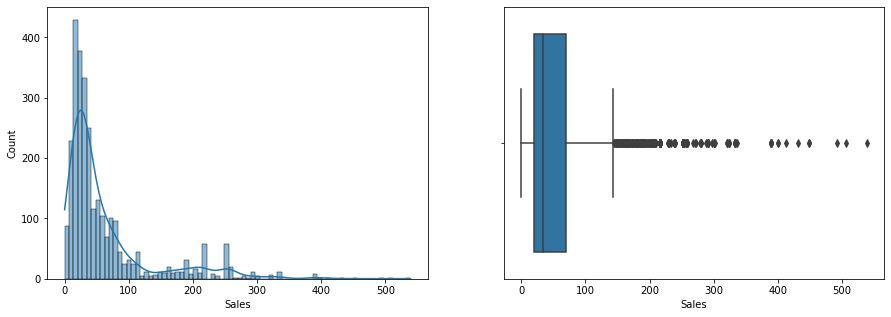

In [97]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(df2['Sales'], kde=True, ax=axes[0])
sns.boxplot(x='Sales', data=df2, ax=axes[1])
plt.show()

In [98]:
print("The 25th quantile of Sales is",df2['Sales'].quantile(0.25))
print("The median or 50th quantile of Sales is",df2['Sales'].quantile(0.5))
print("The 75th quantile of Sales is",df2['Sales'].quantile(0.75))
print("The Interquantile range (IQR) of Sales is",df2['Sales'].quantile(0.75)-df2['Sales'].quantile(0.25))
print("Lower limit of Sales is",df2['Sales'].quantile(0.25)-(1.5*(df2['Sales'].quantile(0.75)-df2['Sales'].quantile(0.25))))
print("Upper limit of Sales is",df2['Sales'].quantile(0.75)+(1.5*(df2['Sales'].quantile(0.75)-df2['Sales'].quantile(0.25))))
print("The distribution of Sales is right skewed",df2['Sales'].skew())

The 25th quantile of Sales is 20.0
The median or 50th quantile of Sales is 33.5
The 75th quantile of Sales is 69.3
The Interquantile range (IQR) of Sales is 49.3
Lower limit of Sales is -53.94999999999999
Upper limit of Sales is 143.25
The distribution of Sales is right skewed 2.3446426921667585


#### Categorical univariate  Analysis

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


In [100]:
df2["Agency_Code"].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

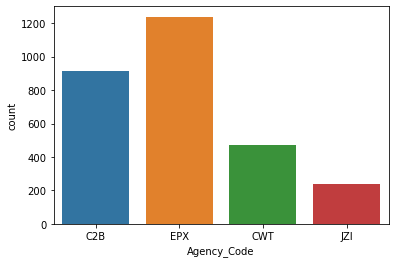

In [101]:
sns.countplot(x="Agency_Code",data=df2);
plt.show()

In [102]:
df2["Type"].value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

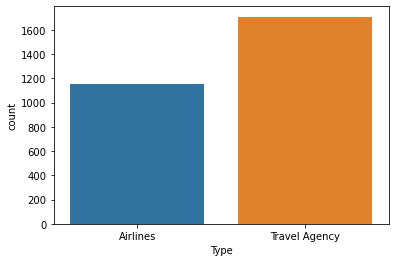

In [103]:
sns.countplot(x="Type",data=df2);
plt.show()

In [104]:
df2["Claimed"].value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

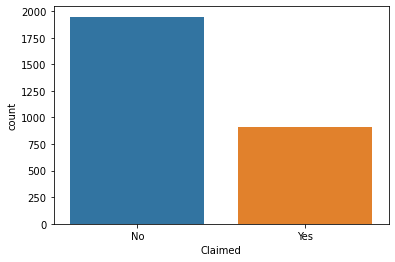

In [105]:
sns.countplot(x="Claimed",data=df2);
plt.show()

In [106]:
df2["Channel"].value_counts()

Online     2815
Offline      46
Name: Channel, dtype: int64

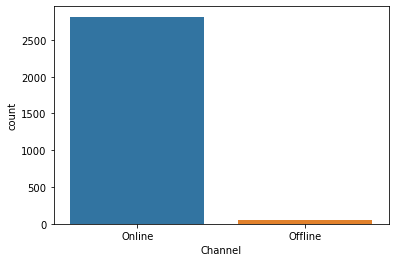

In [107]:
sns.countplot(x="Channel",data=df2);
plt.show()

In [108]:
df2["Product Name"].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

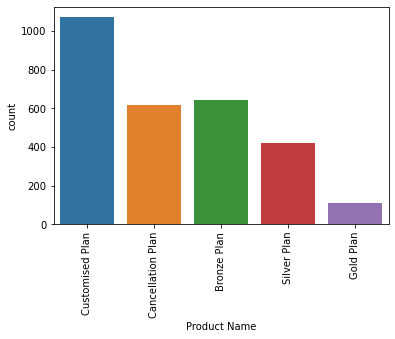

In [109]:
sns.countplot(x="Product Name",data=df2);
plt.xticks(rotation=90)
plt.show()

In [110]:
df2["Destination"].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

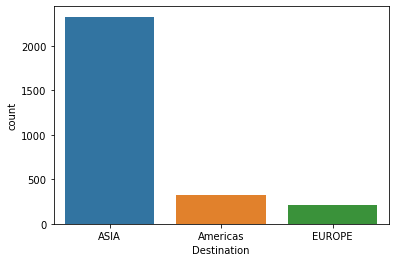

In [111]:
sns.countplot(x="Destination",data=df2);
plt.show()

#### Bivariate  Analysis

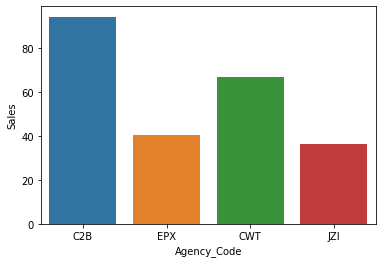

In [112]:
sns.barplot(x="Agency_Code",y="Sales",ci=None,data=df2);
plt.show()

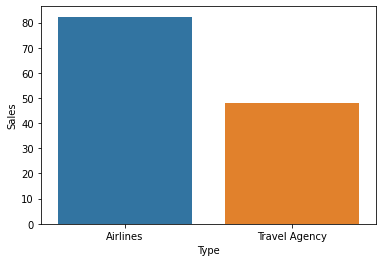

In [113]:
sns.barplot(x="Type",y="Sales",ci=None,data=df2);
plt.show()

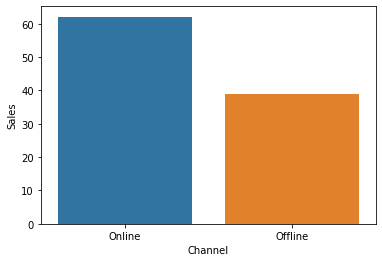

In [114]:
sns.barplot(x="Channel",y="Sales",ci=None,data=df2);
plt.show()

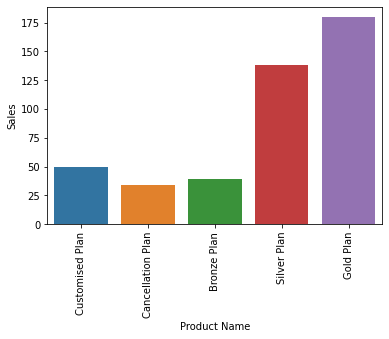

In [115]:
sns.barplot(x="Product Name",y="Sales",ci=None,data=df2);
plt.xticks(rotation=90)
plt.show()

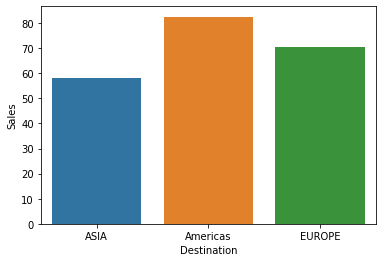

In [116]:
sns.barplot(x="Destination",y="Sales",ci=None,data=df2);
plt.show()

#### Multiivariate  Analysis

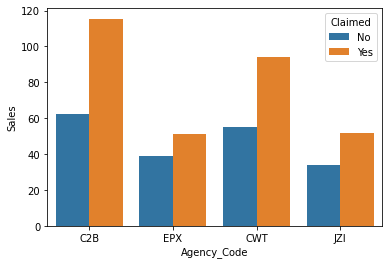

In [117]:
sns.barplot(x="Agency_Code",y="Sales",ci=None,hue="Claimed",data=df2);

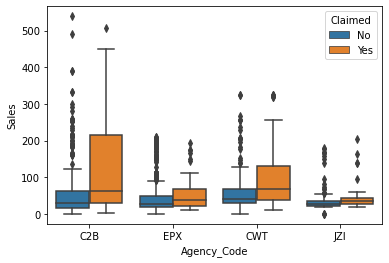

In [118]:
sns.boxplot(x="Agency_Code",y="Sales",hue="Claimed",data=df2);

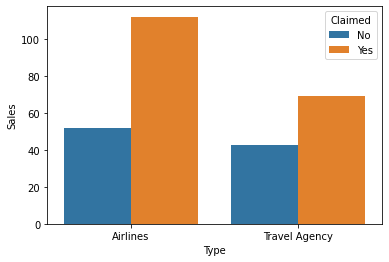

In [119]:
sns.barplot(x="Type",y="Sales",ci=None,hue="Claimed",data=df2);

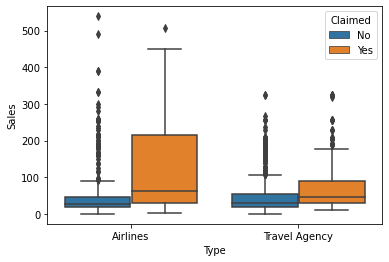

In [120]:
sns.boxplot(x="Type",y="Sales",hue="Claimed",data=df2);

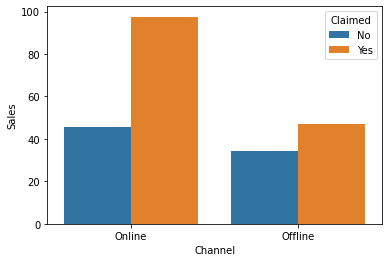

In [121]:
sns.barplot(x="Channel",y="Sales",ci=None,hue="Claimed",data=df2);

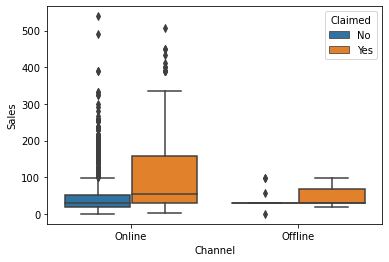

In [122]:
sns.boxplot(x="Channel",y="Sales",hue="Claimed",data=df2);

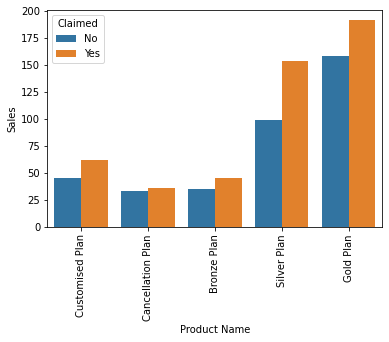

In [123]:
sns.barplot(x="Product Name",y="Sales",ci=None,hue="Claimed",data=df2);
plt.xticks(rotation=90)
plt.show()

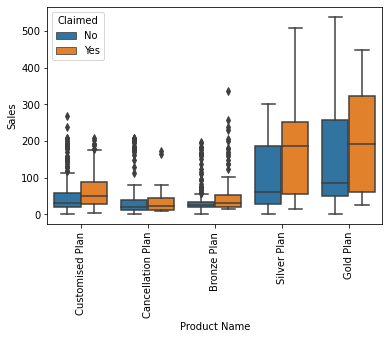

In [124]:
sns.boxplot(x="Product Name",y="Sales",hue="Claimed",data=df2);
plt.xticks(rotation=90)
plt.show()

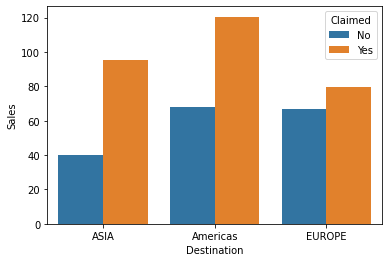

In [125]:
sns.barplot(x="Destination",y="Sales",ci=None,hue="Claimed",data=df2);

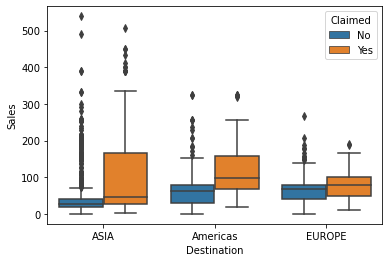

In [126]:
sns.boxplot(x="Destination",y="Sales",hue="Claimed",data=df2);

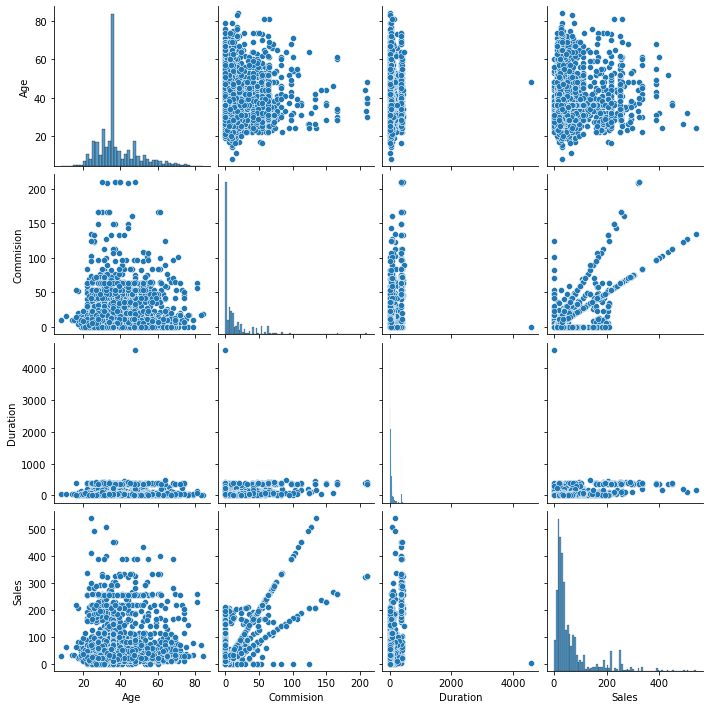

In [127]:
sns.pairplot(df2[['Age', 'Commision', 'Duration', 'Sales']]);

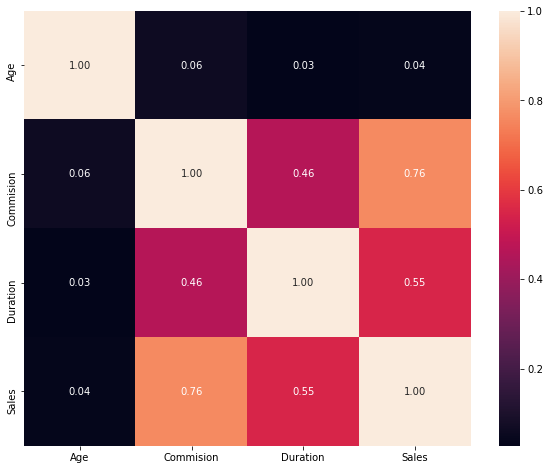

In [128]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df2[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True,fmt='.2f');

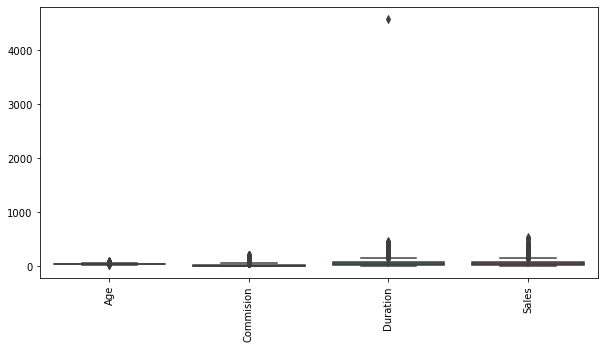

In [129]:
# Checking for Outliers
plt.figure(figsize=(10,5))
box = sns.boxplot(data=df2)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);
plt.show()

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [130]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


In [132]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [133]:
#proportion of taregt variable
df2.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [134]:
#Extracting the target column into separate vectors for training set and test set

X = df2.drop("Claimed" , axis=1)

y = df2.pop("Claimed")

In [135]:
#Splitting the data into Train & Test sets

X_train, X_test, train_labels  , test_labels  = train_test_split(X, y, test_size=.30, random_state=1)

In [136]:
#Checking the dimensions on train and test data.

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2002+859)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)
Total Obs 2861


### Building a Decision Tree Classifier (CART Model)

In [137]:
#Initialise a Decission Tree
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [138]:
#Fit model
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [139]:
train_char_label = ['No','Yes']
dm_Tree_File = open('dm_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model,
                               out_file = dm_Tree_File,
                               feature_names = list(X_train),
                               class_names = list(train_char_label))
dm_Tree_File.close()

In [140]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.255173
Sales         0.225203
Age           0.204564
Agency_Code   0.169594
Commision     0.081343
Product Name  0.032362
Destination   0.027632
Channel       0.003908
Type          0.000220


### Grid Search for finding out the optimal values for the hyper parameters

In [141]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5,6,8,10],
    'min_samples_leaf': [40,45,50],
    'min_samples_split': [200,250,350,450],
}


rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [142]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 6, 8, 10],
                         'min_samples_leaf': [40, 45, 50],
                         'min_samples_split': [200, 250, 350, 450]})

In [143]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 200}

In [144]:
best_grid = grid_search.best_estimator_

In [145]:
best_grid

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=200,
                       random_state=1)

In [146]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_leaf=50,min_samples_split=200,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=200,
                       random_state=1)

In [147]:
from sklearn import tree
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

### Variable Importance

In [148]:
best_grid.feature_importances_

array([0.01906625, 0.33808777, 0.0620987 , 0.12591016, 0.        ,
       0.04035062, 0.18028987, 0.22394244, 0.01025419])

In [149]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.338088
Product Name  0.223942
Sales         0.180290
Commision     0.125910
Type          0.062099
Duration      0.040351
Age           0.019066
Destination   0.010254
Channel       0.000000


### Predicting on Training and Test dataset

In [150]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [151]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2002,)
ytest_predict (859,)


### Getting the Predicted Classes

In [152]:
ytest_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

### Getting the Predicted Probabilities

In [153]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob

array([[0.63753561, 0.36246439],
       [0.9068952 , 0.0931048 ],
       [0.30690327, 0.69309673],
       ...,
       [0.61313318, 0.38686682],
       [0.87864997, 0.12135003],
       [0.81515036, 0.18484964]])

In [154]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.637536,0.362464
1,0.906895,0.093105
2,0.306903,0.693097
3,0.759145,0.240855
4,0.701333,0.298667


### AUC-ROC CURVE -TRAINING DATA

In [155]:
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]

probs[:,1]

array([0.38624574, 0.22962566, 0.28490124, ..., 0.0607133 , 0.28455422,
       0.30743501])

Area under Curve is 0.810897799017437


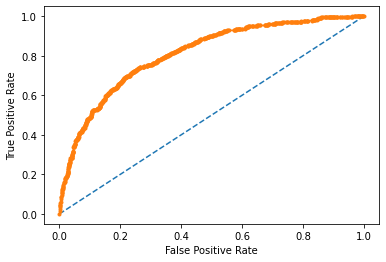

In [156]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
# print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr,cart_train_tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under Curve is', cart_train_auc)
plt.show()

### AUC-ROC CURVE -TEST DATA

Area under Curve is 0.8185700479453774


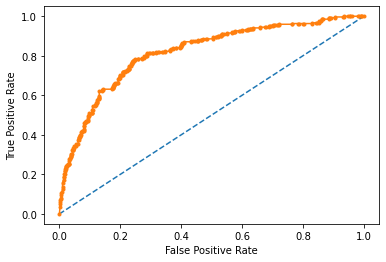

In [157]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
# print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
# show the plot 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under Curve is', cart_test_auc)
plt.show()

### CONFUSION MATRIX AND CLASSIFICATION REPORT TRAINING DATA

In [158]:
confusion_matrix(train_labels, ytrain_predict)

array([[1214,  145],
       [ 312,  331]], dtype=int64)

In [159]:
#Train Data Accuracy
# print("Accurauy",(tp+tn)/(tn+fp+fn+tp))
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7717282717282717

In [160]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.70      0.51      0.59       643

    accuracy                           0.77      2002
   macro avg       0.75      0.70      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [161]:
tn, fp, fn, tp=confusion_matrix(train_labels,best_grid.predict(X_train)).ravel()

In [162]:
cart_train_recall=((tp)/(tp+fn))
cart_train_recall

cart_train_Specificity=(tn)/(tn+fp)
cart_train_Specificity

cart_train_Precision=(tp)/(tp+fp)
cart_train_Precision

cart_train_F1_Score=(2*(cart_train_recall*cart_train_Precision)/(cart_train_recall+cart_train_Precision))
cart_train_F1_Score

0.5915996425379804

In [163]:
print("CART Train-Accuracy",cart_train_acc)
print("CART Train-Recall/Sensitivity",cart_train_recall)
print("CART Train-Specificity",cart_train_Specificity)
print("CART Train-Precision",cart_train_Precision)
print("CART Train-F1 Score",(cart_train_F1_Score))

CART Train-Accuracy 0.7717282717282717
CART Train-Recall/Sensitivity 0.5147744945567652
CART Train-Specificity 0.8933038999264165
CART Train-Precision 0.6953781512605042
CART Train-F1 Score 0.5915996425379804


### CONFUSION MATRIX AND CLASSIFICATION REPORT TEST DATA

In [164]:
confusion_matrix(test_labels, ytest_predict)

array([[529,  59],
       [133, 138]], dtype=int64)

In [165]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)

In [166]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.70      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.77       859



In [167]:
tn, fp, fn, tp=confusion_matrix(test_labels,best_grid.predict(X_test)).ravel()

In [168]:
cart_test_recall=((tp)/(tp+fn))
cart_test_recall

cart_test_Specificity=(tn)/(tn+fp)
cart_test_Specificity

cart_test_Precision=(tp)/(tp+fp)
cart_test_Precision

cart_test_F1_Score=(2*(cart_test_recall*cart_test_Precision)/(cart_test_recall+cart_test_Precision))
cart_test_F1_Score

0.5897435897435898

In [169]:
print("CART Test-Accuracy",cart_test_acc)
print("CART Test-Recall/Sensitivity",cart_test_recall)
print("CART Test-Specificity",cart_test_Specificity)
print("CART Test-Precision",cart_test_Precision)
print("CART Test-F1 Score",(cart_test_F1_Score))

CART Test-Accuracy 0.7764842840512224
CART Test-Recall/Sensitivity 0.5092250922509225
CART Test-Specificity 0.8996598639455783
CART Test-Precision 0.700507614213198
CART Test-F1 Score 0.5897435897435898


### RANDOM FOREST MODEL

In [170]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3],
    'max_features': [3,4],
    'min_samples_leaf': [8,45],
    'min_samples_split': [45],
    'n_estimators': [200,350]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [171]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [3],
                         'max_features': [3, 4], 'min_samples_leaf': [8, 45],
                         'min_samples_split': [45],
                         'n_estimators': [200, 350]})

In [172]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 45,
 'min_samples_split': 45,
 'n_estimators': 200}

In [173]:
best_grid = grid_search.best_estimator_

In [174]:
best_grid

RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=45,
                       min_samples_split=45, n_estimators=200, random_state=1)

In [175]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,max_features=4,min_samples_leaf=8,min_samples_split=45,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=8,
                       min_samples_split=45, random_state=1)

In [176]:
from sklearn import tree
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

### Variable Importance

In [177]:
best_grid.feature_importances_

array([0.01430279, 0.31103227, 0.07247007, 0.12766291, 0.        ,
       0.03896518, 0.1650941 , 0.26271422, 0.00775846])

In [178]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.311032
Product Name  0.262714
Sales         0.165094
Commision     0.127663
Type          0.072470
Duration      0.038965
Age           0.014303
Destination   0.007758
Channel       0.000000


### Predicting on Training and Test dataset

In [179]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [180]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2002,)
ytest_predict (859,)


### Getting the Predicted Classes

In [181]:
ytest_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

### Getting the Predicted Probabilities

In [182]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob

array([[0.68571971, 0.31428029],
       [0.8738962 , 0.1261038 ],
       [0.32847316, 0.67152684],
       ...,
       [0.62855717, 0.37144283],
       [0.84378295, 0.15621705],
       [0.82976697, 0.17023303]])

In [183]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685720,0.314280
1,0.873896,0.126104
2,0.328473,0.671527
3,0.764628,0.235372
4,0.724803,0.275197


### AUC-ROC CURVE -TRAINING DATA

In [184]:
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]

probs[:,1]

array([0.34578062, 0.19621306, 0.27419497, ..., 0.10551833, 0.24684483,
       0.26183186])

Area under Curve is 0.8033140047857896


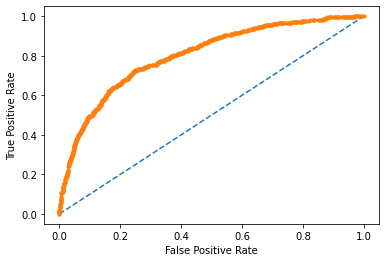

In [185]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_train_auc = roc_auc_score(train_labels, probs)
# print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr,rf_train_tpr, marker='.')
# show the plot 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under Curve is', rf_train_auc)
plt.show()

### AUC-ROC CURVE -TEST DATA

Area under Curve is 0.8120309009212541


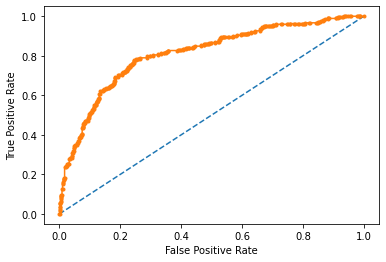

In [186]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_test_auc = roc_auc_score(test_labels, probs)
# print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_test_fpr,rf_test_tpr, rf_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr,rf_test_tpr, marker='.')
# show the plot     
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under Curve is', rf_test_auc)
plt.show()

### CONFUSION MATRIX AND CLASSIFICATION REPORT TRAINING DATA)¶

In [187]:
confusion_matrix(train_labels, ytrain_predict)

array([[1228,  131],
       [ 329,  314]], dtype=int64)

In [188]:
#Train Data Accuracy
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7702297702297702

In [189]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1359
           1       0.71      0.49      0.58       643

    accuracy                           0.77      2002
   macro avg       0.75      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



In [190]:
tn, fp, fn, tp=confusion_matrix(train_labels,best_grid.predict(X_train)).ravel()

In [191]:
rf_train_recall=((tp)/(tp+fn))
rf_train_recall

rf_train_Specificity=(tn)/(tn+fp)
rf_train_Specificity

rf_train_precision=(tp)/(tp+fp)
rf_train_precision

rf_train_f1=(2*(rf_train_recall*rf_train_precision)/(rf_train_recall+rf_train_precision))
rf_train_f1

0.5772058823529411

In [192]:
print("Random Forest Training data-Accuracy",rf_train_acc)
print("Random Forest Training data-Recall/Sensitivity",rf_train_recall)
print("Random Forest Training data-Specificity",rf_train_Specificity)
print("Random Forest Training data-Precision",rf_train_precision)
print("Random Forest Training data-F1 Score",(rf_train_f1))    

Random Forest Training data-Accuracy 0.7702297702297702
Random Forest Training data-Recall/Sensitivity 0.48833592534992226
Random Forest Training data-Specificity 0.9036055923473142
Random Forest Training data-Precision 0.7056179775280899
Random Forest Training data-F1 Score 0.5772058823529411


### CONFUSION MATRIX AND CLASSIFICATION REPORT TEST DATA

In [193]:
confusion_matrix(test_labels, ytest_predict)

array([[536,  52],
       [143, 128]], dtype=int64)

In [194]:
#Test Data Accuracy
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7729918509895227

In [195]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       588
           1       0.71      0.47      0.57       271

    accuracy                           0.77       859
   macro avg       0.75      0.69      0.71       859
weighted avg       0.76      0.77      0.76       859



In [196]:
tn, fp, fn, tp=confusion_matrix(test_labels,best_grid.predict(X_test)).ravel()

In [197]:
rf_test_recall=((tp)/(tp+fn))
rf_test_recall

rf_test_Specificity=(tn)/(tn+fp)
rf_test_Specificity

rf_test_precision=(tp)/(tp+fp)
rf_test_precision

rf_test_f1=(2*(rf_test_recall*rf_test_precision)/(rf_test_recall+rf_test_precision))
rf_test_f1

0.5676274944567627

In [198]:
print("Random Forest Test Data-Accuracy",rf_test_acc)
print("Random Forest Test Data-Recall/Sensitivity",rf_test_recall)
print("Random Forest Test Data-Specificity",rf_test_Specificity)
print("Random Forest Test Data-Precision",rf_test_precision)
print("Random Forest Test Data-F1 Score",(rf_test_f1))

Random Forest Test Data-Accuracy 0.7729918509895227
Random Forest Test Data-Recall/Sensitivity 0.47232472324723246
Random Forest Test Data-Specificity 0.9115646258503401
Random Forest Test Data-Precision 0.7111111111111111
Random Forest Test Data-F1 Score 0.5676274944567627


### NEUTRAL NETWORK MODEL

### Scaling the variables

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [201]:
#Scale the training data
X_train = sc.fit_transform(X_train)

In [202]:
X_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [203]:
# Apply the transformation on the test data
X_test = sc.transform(X_test)

In [204]:
X_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [205]:
from sklearn.model_selection import GridSearchCV

# ***********Neutral Network***************
param_grid = {
    'hidden_layer_sizes': [50,100,150,200],
    'max_iter': [2500,3000,4000,5000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [206]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 150, 200],
                         'max_iter': [2500, 3000, 4000, 5000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [207]:
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [208]:
best_grid = grid_search.best_estimator_

In [209]:
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### Predicting on Training and Test dataset

In [210]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [211]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2002,)
ytest_predict (859,)


### Getting the Predicted Classes

In [212]:
ytest_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

### Getting the Predicted Probabilities

In [213]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob

array([[0.38548589, 0.61451411],
       [0.92467003, 0.07532997],
       [0.32905044, 0.67094956],
       ...,
       [0.51604662, 0.48395338],
       [0.90107834, 0.09892166],
       [0.85881146, 0.14118854]])

In [214]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.385486,0.614514
1,0.924670,0.075330
2,0.329050,0.670950
3,0.722018,0.277982
4,0.682431,0.317569


### AUC-ROC CURVE -TRAINING DATA

In [215]:
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]

probs[:,1]

array([0.36439896, 0.15226582, 0.33040364, ..., 0.10611823, 0.23801237,
       0.33307753])

Area under Curve is 0.7921265636497425


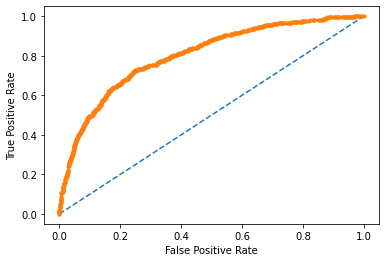

In [216]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_train_auc = roc_auc_score(train_labels, probs)
# print('AUC: %.3f' % rf_train_auc) 
# calculate roc curve
from sklearn.metrics import roc_curve
nn_train_fpr, nn_train_tpr, nn_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr,rf_train_tpr, marker='.')
# show the plot 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under Curve is', nn_train_auc)
plt.show()

### AUC-ROC CURVE -TEST DATA

Area under Curve is 0.7977947636619223


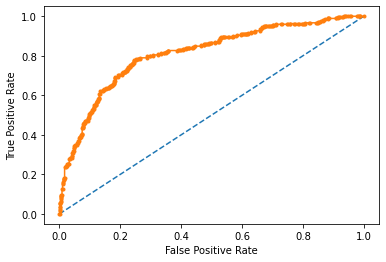

In [217]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_test_auc = roc_auc_score(test_labels, probs)
# print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_test_fpr,nn_test_tpr, nn_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr,rf_test_tpr, marker='.')
# show the plot     
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under Curve is', nn_test_auc)
plt.show()

### CONFUSION MATRIX AND CLASSIFICATION REPORT TRAINING DATA¶

In [218]:
confusion_matrix(train_labels, ytrain_predict)

array([[1159,  200],
       [ 285,  358]], dtype=int64)

In [219]:
#Train Data Accuracy
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7577422577422578

In [220]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1359
           1       0.64      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.72      0.70      0.71      2002
weighted avg       0.75      0.76      0.75      2002



In [221]:
tn, fp, fn, tp=confusion_matrix(train_labels,best_grid.predict(X_train)).ravel()

In [222]:
nn_train_recall=((tp)/(tp+fn))
nn_train_recall

nn_train_Specificity=(tn)/(tn+fp)
nn_train_Specificity

nn_train_precision=(tp)/(tp+fp)
nn_train_precision

nn_train_f1=(2*(nn_train_recall*nn_train_precision)/(nn_train_recall+nn_train_precision))
nn_train_f1

0.5961698584512906

In [223]:
print("Neutral Network Training data-Accuracy",nn_train_acc)
print("Neutral Network Training data-Recall/Sensitivity",nn_train_recall)
print("Neutral Network Training data-Specificity",nn_train_Specificity)
print("Neutral Network Training data-Precision",nn_train_precision)
print("Neutral Network Training data-F1 Score",(nn_train_f1)) 

Neutral Network Training data-Accuracy 0.7577422577422578
Neutral Network Training data-Recall/Sensitivity 0.5567651632970451
Neutral Network Training data-Specificity 0.8528329654157468
Neutral Network Training data-Precision 0.6415770609318996
Neutral Network Training data-F1 Score 0.5961698584512906


### CONFUSION MATRIX AND CLASSIFICATION REPORT TEST DATA

In [224]:
confusion_matrix(test_labels, ytest_predict)

array([[511,  77],
       [122, 149]], dtype=int64)

In [225]:
#Test Data Accuracy
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7683352735739232

In [226]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



In [227]:
tn, fp, fn, tp=confusion_matrix(test_labels,best_grid.predict(X_test)).ravel()

In [228]:
nn_test_recall=((tp)/(tp+fn))
nn_test_recall

nn_test_Specificity=(tn)/(tn+fp)
nn_test_Specificity

nn_test_precision=(tp)/(tp+fp)
nn_test_precision

nn_test_f1=(2*(nn_test_recall*nn_test_precision)/(nn_test_recall+nn_test_precision))
nn_test_f1

0.5995975855130785

In [229]:
print("Neutral Network Test data-Accuracy",nn_test_acc)
print("Neutral Network Test data-Recall/Sensitivity",nn_test_recall)
print("Neutral Network Test data-Specificity",nn_test_Specificity)
print("Neutral Network Test data-Precision",nn_test_precision)
print("Neutral Network Test data-F1 Score",(nn_test_f1)) 

Neutral Network Test data-Accuracy 0.7683352735739232
Neutral Network Test data-Recall/Sensitivity 0.5498154981549815
Neutral Network Test data-Specificity 0.8690476190476191
Neutral Network Test data-Precision 0.6592920353982301
Neutral Network Test data-F1 Score 0.5995975855130785


### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [230]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_Precision,cart_train_F1_Score],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_Precision,cart_test_F1_Score],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.78,0.77,0.77,0.76,0.77
AUC,0.81,0.82,0.80,0.81,0.79,0.80
Recall,0.51,0.51,0.49,0.47,0.56,0.55
Precision,0.70,0.70,0.71,0.71,0.64,0.66
F1 Score,0.59,0.59,0.58,0.57,0.60,0.60


### ROC for the 3 Models (Training Data)

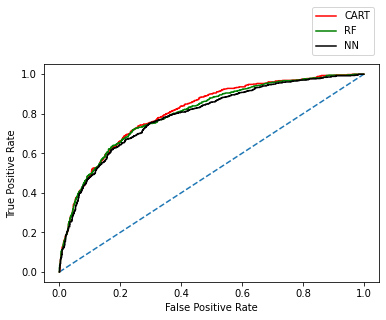

In [231]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC for the 3 Models (Test Data)

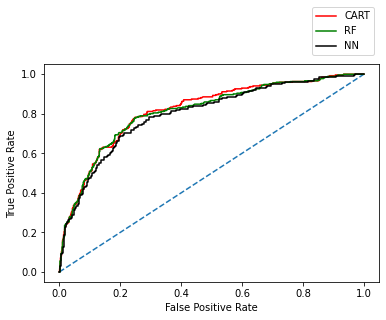

In [232]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')